In [2]:
import pandas as pd 
file =  pd.read_csv('Moblie Price.csv')

In [3]:
x= file.drop(columns={'price_range'})
y =  file['price_range']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
xtrain,xtest,ytrain,ytest =  train_test_split(x,y,train_size=.80,random_state=39)
xtrain_scaled =  scaler.fit_transform(xtrain)
xtest_scaled =  scaler.transform(xtest)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models =  {'logesticcregression': LogisticRegression() , 
           'supportvector': SVC() ,
           'naivebayes': GaussianNB(),
           'knn':KNeighborsClassifier() ,
           'decisiontree': DecisionTreeClassifier() ,
           'randomforest': RandomForestClassifier() ,

}

modelresult = []
for modelname,model in models.items():
    print(modelname,model)
    model.fit(xtrain_scaled,ytrain)
    train_predict =  model.predict(xtrain_scaled)
    test_predict  = model.predict(xtest_scaled)

    train_accuracy = accuracy_score(train_predict,ytrain)
    test_accuracy =  accuracy_score(test_predict,ytest)
    modelresult.append([modelname,train_accuracy,test_accuracy])

    






logesticcregression LogisticRegression()
supportvector SVC()
naivebayes GaussianNB()
knn KNeighborsClassifier()
decisiontree DecisionTreeClassifier()
randomforest RandomForestClassifier()


In [43]:
pd.DataFrame(modelresult,columns=['model name','train_accuracy','test_accuracy'])

,model name,train_accuracy,test_accuracy
0,logesticcregression,0.938125,0.9350
1,supportvector,0.971250,0.8700
2,naivebayes,0.815000,0.8600
3,knn,0.620000,0.4250
4,decisiontree,1.000000,0.8350
5,randomforest,1.000000,0.8925


<Axes: >

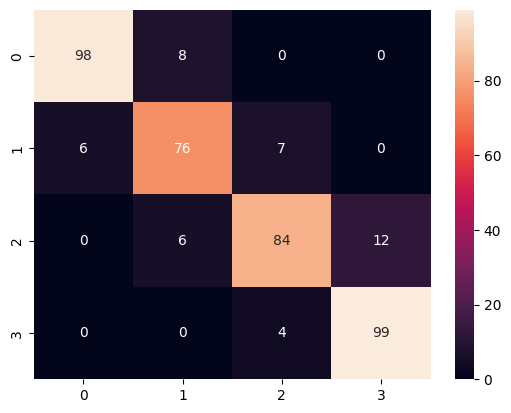

In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_predict,ytest)

import seaborn as sns 
sns.heatmap(confusion_matrix(test_predict,ytest) ,annot=True   )


In [45]:
from sklearn.metrics import classification_report


print(classification_report(test_predict,ytest))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       106
           1       0.84      0.85      0.85        89
           2       0.88      0.82      0.85       102
           3       0.89      0.96      0.93       103

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400

